In [2]:
%pip install -r ../requirements.txt


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import os
import numpy as np
import shap


In [4]:
df = pd.read_csv("../data/target_and_features_tij_melle_plus_q.csv")
df.head()

,tide_no,tij_ant,tij_mel,timestamp_melle,tij,tij_is_HW,rounded_tide_time,ncatch_leie,ncatch_0.25d_leie,ncatch_0.5d_leie,...,qmean_0.5d_deinze,qmean_1d_deinze,mean_q_gavere,qmean_0.25d_gavere,qmean_0.5d_gavere,qmean_1d_gavere,mean_q_merendree,qmean_0.25d_merendree,qmean_0.5d_merendree,qmean_1d_merendree
0,20180443,5.24,4.95,2018-04-25 15:08:00,HW,True,2018-04-25 15:00:00,0.0,0.0,0.2,...,2.9,2.7,17.825,19.3,16.1,18.7,8.5175,27.4,24.9,21.3
1,20180445,5.08,4.82,2018-04-26 03:48:00,HW,True,2018-04-26 04:00:00,0.0,0.0,0.0,...,3.8,2.9,5.795,21.6,22.0,18.7,53.7150,17.2,21.2,21.8
2,20180447,5.39,4.98,2018-04-26 16:28:00,HW,True,2018-04-26 16:00:00,0.0,0.0,0.0,...,1.6,2.7,22.260,12.4,15.5,18.7,3.6550,22.9,20.3,20.7
3,20180449,5.14,4.79,2018-04-27 04:57:00,HW,True,2018-04-27 05:00:00,0.0,0.0,0.0,...,3.2,2.5,3.260,18.2,16.9,18.7,46.5100,25.8,20.9,19.0
4,20180451,5.39,4.87,2018-04-27 17:40:00,HW,True,2018-04-27 18:00:00,0.0,0.0,0.0,...,1.8,2.3,42.905,20.3,21.9,20.3,10.2900,9.6,13.9,18.1


In [5]:
column_types = df.dtypes
print(column_types)

tide_no                    int64
tij_ant                  float64
tij_mel                  float64
timestamp_melle           object
tij                       object
tij_is_HW                   bool
rounded_tide_time         object
ncatch_leie              float64
ncatch_0.25d_leie        float64
ncatch_0.5d_leie         float64
ncatch_1d_leie           float64
ncatch_2d_leie           float64
ncatch_7d_leie           float64
ncatch_14d_leie          float64
ncatch_30d_leie          float64
ncatch_60d_leie          float64
ncatch_90d_leie          float64
ncatch_bs                float64
ncatch_0.25d_bs          float64
ncatch_0.5d_bs           float64
ncatch_1d_bs             float64
ncatch_2d_bs             float64
ncatch_7d_bs             float64
ncatch_14d_bs            float64
ncatch_30d_bs            float64
ncatch_60d_bs            float64
ncatch_90d_bs            float64
mean_q_deinze            float64
qmean_0.25d_deinze       float64
qmean_0.5d_deinze        float64
qmean_1d_d

hans_ud_cat_*
raan_ud_cat_*

In [6]:
df = df.drop(['tide_no','rounded_tide_time','tij'],axis=1)
df.head()

,tij_ant,tij_mel,timestamp_melle,tij_is_HW,ncatch_leie,ncatch_0.25d_leie,ncatch_0.5d_leie,ncatch_1d_leie,ncatch_2d_leie,ncatch_7d_leie,...,qmean_0.5d_deinze,qmean_1d_deinze,mean_q_gavere,qmean_0.25d_gavere,qmean_0.5d_gavere,qmean_1d_gavere,mean_q_merendree,qmean_0.25d_merendree,qmean_0.5d_merendree,qmean_1d_merendree
0,5.24,4.95,2018-04-25 15:08:00,True,0.0,0.0,0.2,0.2,0.2,0.2,...,2.9,2.7,17.825,19.3,16.1,18.7,8.5175,27.4,24.9,21.3
1,5.08,4.82,2018-04-26 03:48:00,True,0.0,0.0,0.0,0.0,0.2,0.2,...,3.8,2.9,5.795,21.6,22.0,18.7,53.7150,17.2,21.2,21.8
2,5.39,4.98,2018-04-26 16:28:00,True,0.0,0.0,0.0,0.0,0.2,0.2,...,1.6,2.7,22.260,12.4,15.5,18.7,3.6550,22.9,20.3,20.7
3,5.14,4.79,2018-04-27 04:57:00,True,0.0,0.0,0.0,0.0,0.0,0.2,...,3.2,2.5,3.260,18.2,16.9,18.7,46.5100,25.8,20.9,19.0
4,5.39,4.87,2018-04-27 17:40:00,True,0.0,0.0,0.0,0.0,0.0,0.2,...,1.8,2.3,42.905,20.3,21.9,20.3,10.2900,9.6,13.9,18.1


In [8]:
df['timestamp_melle'] = pd.to_datetime(df['timestamp_melle'], format='%Y-%m-%d %H:%M:%S')


In [9]:
df.head()

,tij_ant,tij_mel,timestamp_melle,tij_is_HW,ncatch_leie,ncatch_0.25d_leie,ncatch_0.5d_leie,ncatch_1d_leie,ncatch_2d_leie,ncatch_7d_leie,...,qmean_0.5d_deinze,qmean_1d_deinze,mean_q_gavere,qmean_0.25d_gavere,qmean_0.5d_gavere,qmean_1d_gavere,mean_q_merendree,qmean_0.25d_merendree,qmean_0.5d_merendree,qmean_1d_merendree
0,5.24,4.95,2018-04-25 15:08:00,True,0.0,0.0,0.2,0.2,0.2,0.2,...,2.9,2.7,17.825,19.3,16.1,18.7,8.5175,27.4,24.9,21.3
1,5.08,4.82,2018-04-26 03:48:00,True,0.0,0.0,0.0,0.0,0.2,0.2,...,3.8,2.9,5.795,21.6,22.0,18.7,53.7150,17.2,21.2,21.8
2,5.39,4.98,2018-04-26 16:28:00,True,0.0,0.0,0.0,0.0,0.2,0.2,...,1.6,2.7,22.260,12.4,15.5,18.7,3.6550,22.9,20.3,20.7
3,5.14,4.79,2018-04-27 04:57:00,True,0.0,0.0,0.0,0.0,0.0,0.2,...,3.2,2.5,3.260,18.2,16.9,18.7,46.5100,25.8,20.9,19.0
4,5.39,4.87,2018-04-27 17:40:00,True,0.0,0.0,0.0,0.0,0.0,0.2,...,1.8,2.3,42.905,20.3,21.9,20.3,10.2900,9.6,13.9,18.1


In [11]:
trainingSet = df[df['timestamp_melle']< pd.to_datetime("2023-10-01")]
testSet = df[df['timestamp_melle']>= pd.to_datetime("2023-10-01")]


In [13]:
trainingSet['timestamp_melle'] = trainingSet['timestamp_melle'].dt.month
testSet['timestamp_melle'] = testSet['timestamp_melle'].dt.month



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
column_types = trainingSet.dtypes
print(column_types)

tij_ant                  float64
tij_mel                  float64
timestamp_melle            int32
tij_is_HW                   bool
ncatch_leie              float64
ncatch_0.25d_leie        float64
ncatch_0.5d_leie         float64
ncatch_1d_leie           float64
ncatch_2d_leie           float64
ncatch_7d_leie           float64
ncatch_14d_leie          float64
ncatch_30d_leie          float64
ncatch_60d_leie          float64
ncatch_90d_leie          float64
ncatch_bs                float64
ncatch_0.25d_bs          float64
ncatch_0.5d_bs           float64
ncatch_1d_bs             float64
ncatch_2d_bs             float64
ncatch_7d_bs             float64
ncatch_14d_bs            float64
ncatch_30d_bs            float64
ncatch_60d_bs            float64
ncatch_90d_bs            float64
mean_q_deinze            float64
qmean_0.25d_deinze       float64
qmean_0.5d_deinze        float64
qmean_1d_deinze          float64
mean_q_gavere            float64
qmean_0.25d_gavere       float64
qmean_0.5d

In [15]:
Ytrain = trainingSet['tij_mel']
Ytest = testSet['tij_mel']

Xtrain = trainingSet.drop(['tij_mel'],axis=1)
Xtest = testSet.drop(['tij_mel'],axis=1)


In [ ]:
toDrop = []
for column in Xtrain.columns:
    if Xtrain[column].isna().any():
        print(f"Column '{column}' contains NaN values:")
        toDrop.append(column)

Xtrain = Xtrain.drop(toDrop,axis=1)
Xtest = Xtest.drop(toDrop,axis=1)

In [17]:
Xtrain.columns

Index(['tij_ant', 'timestamp_melle', 'tij_is_HW', 'ncatch_leie',
       'ncatch_0.25d_leie', 'ncatch_0.5d_leie', 'ncatch_1d_leie',
       'ncatch_2d_leie', 'ncatch_7d_leie', 'ncatch_14d_leie',
       'ncatch_30d_leie', 'ncatch_60d_leie', 'ncatch_90d_leie', 'ncatch_bs',
       'ncatch_0.25d_bs', 'ncatch_0.5d_bs', 'ncatch_1d_bs', 'ncatch_2d_bs',
       'ncatch_7d_bs', 'ncatch_14d_bs', 'ncatch_30d_bs', 'ncatch_60d_bs',
       'ncatch_90d_bs', 'mean_q_deinze', 'qmean_0.25d_deinze',
       'qmean_0.5d_deinze', 'qmean_1d_deinze', 'mean_q_gavere',
       'qmean_0.25d_gavere', 'qmean_0.5d_gavere', 'qmean_1d_gavere',
       'mean_q_merendree', 'qmean_0.25d_merendree', 'qmean_0.5d_merendree',
       'qmean_1d_merendree'],
      dtype='object')

## Ridge

In [27]:
from sklearn import linear_model
clf = linear_model.Ridge(alpha=0.1)
clf.fit(Xtrain,Ytrain)

Ridge(alpha=0.1)

In [28]:
predictions = clf.predict(Xtest)

In [29]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

test_MSE = mean_squared_error(Ytest,predictions)
print(f"baseline: de MSE error op de test set is: {test_MSE}")
test_RMSE = root_mean_squared_error(Ytest,predictions)
print(f"baseline: de RMSE error op de test set is: {test_RMSE}")

baseline: de MSE error op de test set is: 0.20676997063279498
baseline: de RMSE error op de test set is: 0.4547196615858995


In [30]:
coefficients = clf.coef_
sorted_features = sorted(zip(Xtrain.columns, coefficients), key=lambda x: x[1], reverse=True)
print('Feature Coefficients:')
for feature, coefficient in sorted_features:
    print(f'{feature}: {coefficient}')


Feature Coefficients:
tij_is_HW: 0.6369637961827193
tij_ant: 0.4009401691316538
ncatch_leie: 0.01659741987607734
qmean_0.5d_deinze: 0.01624989352056644
qmean_1d_deinze: 0.015003841596069425
ncatch_bs: 0.012303889496462354
ncatch_0.5d_leie: 0.011581204589048027
ncatch_1d_bs: 0.010253612727021284
qmean_0.25d_merendree: 0.009302663313992985
qmean_0.25d_gavere: 0.00552601558270852
ncatch_1d_leie: 0.003537158979440669
ncatch_7d_leie: 0.003469805061716966
ncatch_14d_bs: 0.002074892066457192
mean_q_deinze: 0.0020600903637830567
qmean_1d_merendree: 0.0015530342815773212
qmean_0.5d_gavere: 0.001504157778488978
ncatch_90d_leie: 0.0014589877643517485
ncatch_2d_bs: 0.0010822402960162386
qmean_1d_gavere: 0.0010730130041221567
ncatch_30d_bs: 0.0006852056882327474
ncatch_60d_bs: 0.0002967284444691978
ncatch_0.5d_bs: 0.00010406709757223482
ncatch_60d_leie: 2.8338090471817387e-06
ncatch_2d_leie: -0.0002038249101561467
mean_q_gavere: -0.00046625824102063666
ncatch_30d_leie: -0.0009410099227327416
mean_q

Text(0, 0.5, 'True values')

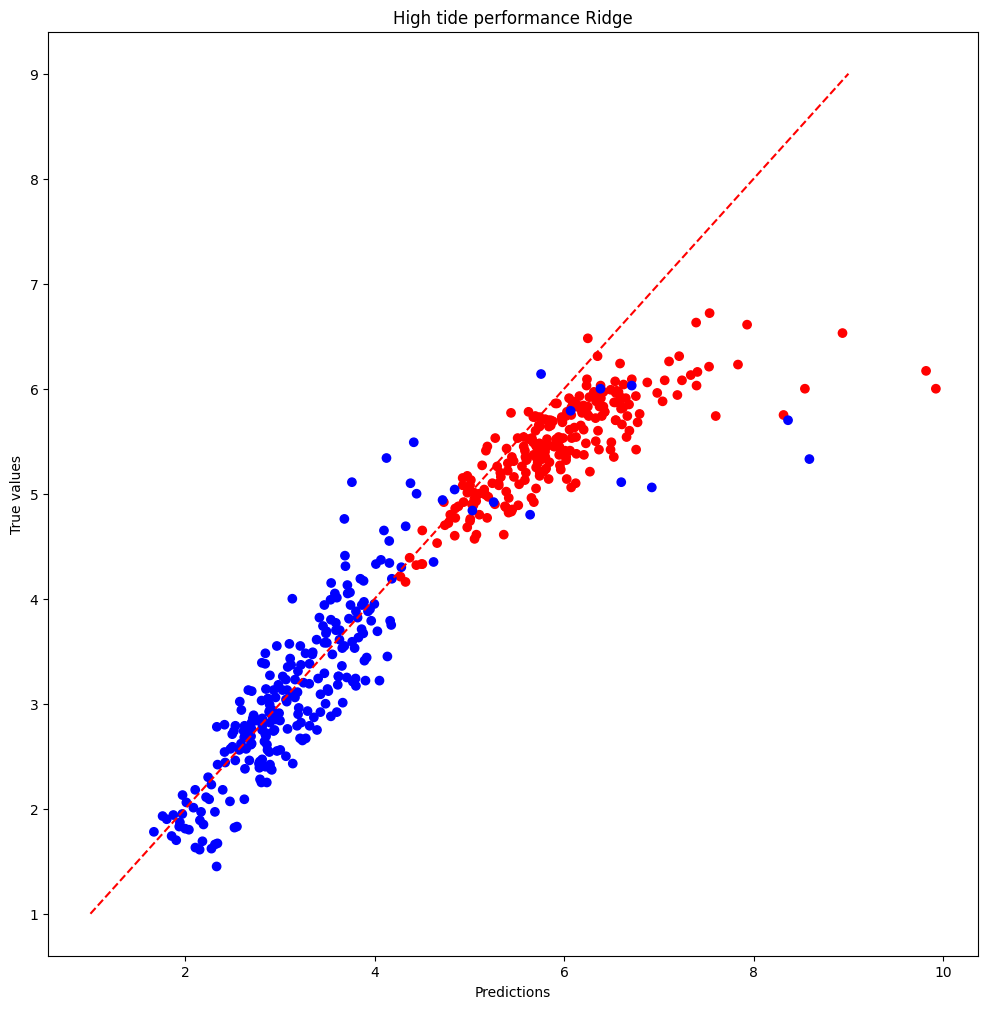

In [45]:
plt.figure(figsize=(12,12))

plt.scatter(predictions,Ytest,color=["red" if x==True else "blue" for x in Xtest["tij_is_HW"]])
plt.title("High tide performance Ridge")
a = 1  # slope
b = 0  # intercept
x_values = [1, 2, 3, 4, 5,6,7,8,9]
# Calculate y values for the ab line
ab_line = [a * x + b for x in x_values]

# Plot the ab line
plt.plot(x_values, ab_line, color='red', linestyle='--', label=f'ab line: y = {a}x + {b}')

plt.xlabel("Predictions")
plt.ylabel("True values")


## MLP

In [56]:
from sklearn.neural_network import MLPRegressor

neuraal_netwerk_vorm = (64,32,32)

mlp = MLPRegressor(hidden_layer_sizes=neuraal_netwerk_vorm,random_state=1)
mlp.fit(Xtrain,Ytrain)
predictions = mlp.predict(Xtest)




In [57]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

test_MSE = mean_squared_error(Ytest,predictions)
print(f"baseline: de MSE error op de test set is: {test_MSE}")
test_RMSE = root_mean_squared_error(Ytest,predictions)
print(f"baseline: de RMSE error op de test set is: {test_RMSE}")

baseline: de MSE error op de test set is: 0.5461803764754791
baseline: de RMSE error op de test set is: 0.7390401724368433


Text(0, 0.5, 'True values')

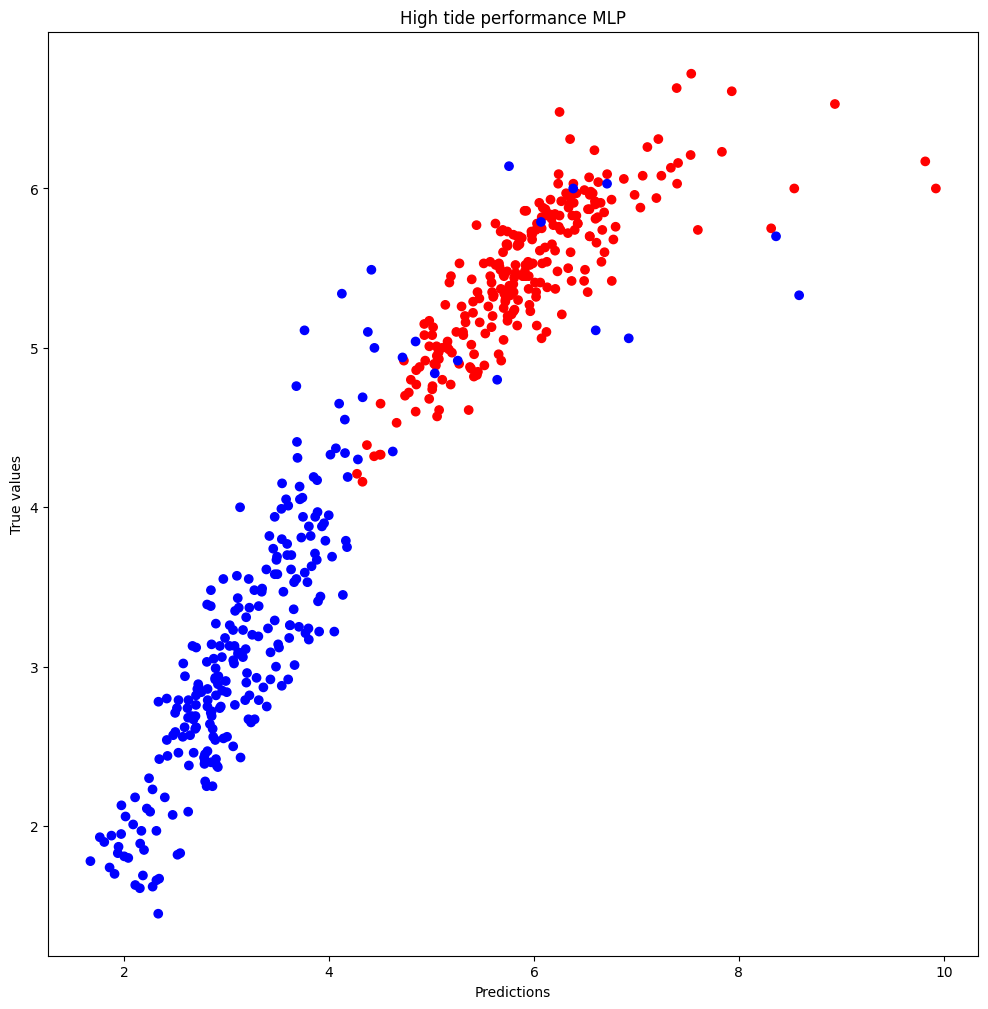

In [44]:
plt.figure(figsize=(12,12))
plt.scatter(predictions,Ytest,color=["red" if x==True else "blue" for x in Xtest["tij_is_HW"]])
plt.title("High tide performance MLP")
plt.xlabel("Predictions")
plt.ylabel("True values")


## Ridge CV

In [58]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, root_mean_squared_error

alphas = np.logspace(-6, 6, 25)
clf = linear_model.RidgeCV(alphas=alphas)
clf.fit(Xtrain,Ytrain)

predictions = clf.predict(Xtest)

test_MSE = mean_squared_error(Ytest,predictions)
print(f"baseline: de MSE error op de test set is: {test_MSE}")
test_RMSE = root_mean_squared_error(Ytest,predictions)
print(f"baseline: de RMSE error op de test set is: {test_RMSE}")

baseline: de MSE error op de test set is: 0.20671803529809546
baseline: de RMSE error op de test set is: 0.45466255101789005


## Decision Tree

In [72]:
from sklearn import tree


decTree = tree.DecisionTreeRegressor(max_depth=9) 
decTree.fit(Xtrain, Ytrain)
predictions= decTree.predict(Xtest)

test_MSE = mean_squared_error(Ytest,predictions)
print(f"baseline: de MSE error op de test set is: {test_MSE}")
test_RMSE = root_mean_squared_error(Ytest,predictions)
print(f"baseline: de RMSE error op de test set is: {test_RMSE}")

baseline: de MSE error op de test set is: 0.08986229452385854
baseline: de RMSE error op de test set is: 0.29977040301513846


Text(0, 0.5, 'True values')

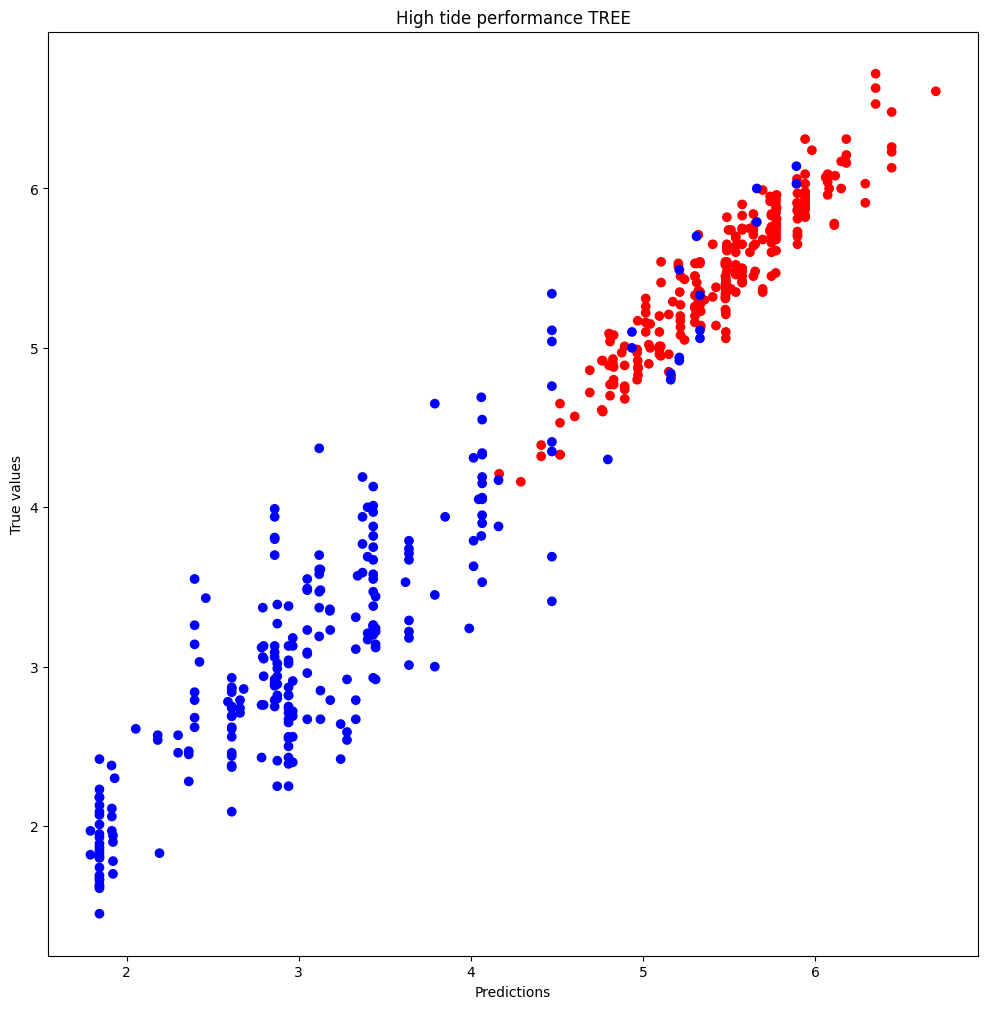

In [73]:
plt.figure(figsize=(12,12))
plt.scatter(predictions,Ytest,color=["red" if x==True else "blue" for x in Xtest["tij_is_HW"]])
plt.title("High tide performance TREE")
plt.xlabel("Predictions")
plt.ylabel("True values")


In [70]:
from sklearn.ensemble import RandomForestRegressor

diepte = 8
aantalBomen = 25 

rf = RandomForestRegressor(max_depth=diepte, n_estimators=aantalBomen) 
rf.fit(Xtrain, Ytrain)
predictions= rf.predict(Xtest)

test_MSE = mean_squared_error(Ytest,predictions)
print(f"baseline: de MSE error op de test set is: {test_MSE}")
test_RMSE = root_mean_squared_error(Ytest,predictions)
print(f"baseline: de RMSE error op de test set is: {test_RMSE}")

baseline: de MSE error op de test set is: 0.0674174636057688
baseline: de RMSE error op de test set is: 0.25964873118459253


Text(0, 0.5, 'True values')

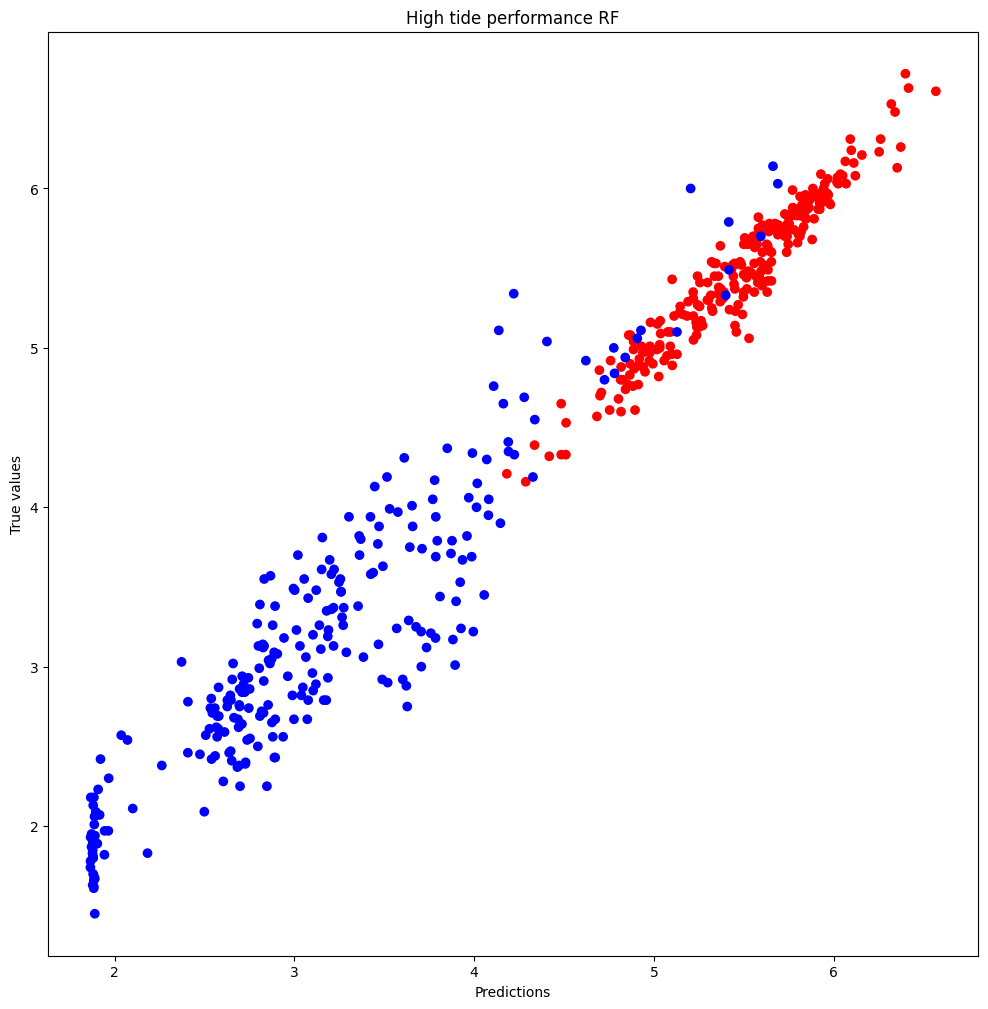

In [71]:
plt.figure(figsize=(12,12))
plt.scatter(predictions,Ytest,color=["red" if x==True else "blue" for x in Xtest["tij_is_HW"]])
plt.title("High tide performance RF")
plt.xlabel("Predictions")
plt.ylabel("True values")


In [87]:
from sklearn.ensemble import HistGradientBoostingRegressor

aantalBomen = 150 
diepte = 3

ensambleTree = HistGradientBoostingRegressor(max_iter= aantalBomen, max_depth=diepte)
ensambleTree.fit(Xtrain, Ytrain)
predictions= ensambleTree.predict(Xtest)
tree_test_MSE = mean_squared_error(Ytest,predictions)
print(f"GradientBoosting ensamble: de MSE error op de test set is: {tree_test_MSE}")
tree_test_RMSE = root_mean_squared_error(Ytest,predictions)
print(f"GradientBoosting ensamble: de RMSE error op de test set is: {tree_test_RMSE}")

GradientBoosting ensamble: de MSE error op de test set is: 0.0578220881098413
GradientBoosting ensamble: de RMSE error op de test set is: 0.2404622384280769


Text(0, 0.5, 'True values')

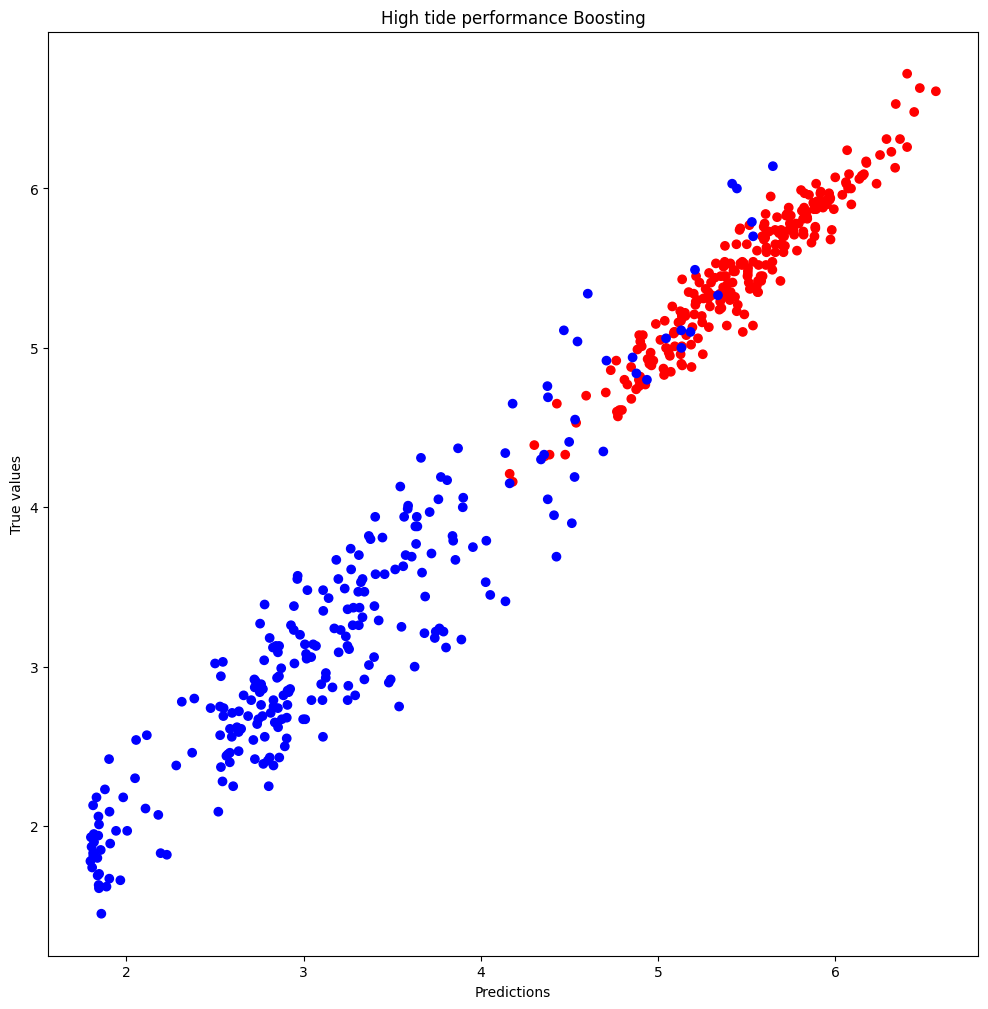

In [88]:
plt.figure(figsize=(12,12))
plt.scatter(predictions,Ytest,color=["red" if x==True else "blue" for x in Xtest["tij_is_HW"]])
plt.title("High tide performance Boosting")
plt.xlabel("Predictions")
plt.ylabel("True values")
